Empirical analysis with Getula eastern pops lumped following K=2
* 8 populations total and downsampling to 16 haploid samples per population

In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datetime
import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import momi
import numpy as np
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

# For this to work dadi must be installed
easySFS = "/home/isaac/easySFS/easySFS.py"
!which $easySFS


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40
/home/isaac/easySFS/easySFS.py


In [4]:
# Set up some directories
prefix = "/home/isaac/media4TB/PTA-EasternSnakes/"
analysis_dir = prefix + "analysis/"
pops_dir = prefix + "East_snakes_PTA_input/pops_files/"
vcf_dir = prefix + "East_snakes_PTA_input/vcf_files/"
sfs_dir = prefix + "East_snakes_PTA_input/sfs_files_16samp/"

# Populations files for each pop were made with the "make_pops_SFS_stairway script"
all_pops = glob.glob(pops_dir + "*")
all_pops = sorted([x.split("/")[-1].rsplit(".", 1)[0] for x in all_pops])

all_pops

['Acontortrix_p123_v2_25miss_popAcontortrix',
 'Dpunctatus_p123_v3_25missEAST_popDpunctatus',
 'Lgetula_p123_v2_25miss_popk2east',
 'Lgetula_p123_v2_25miss_popk4get',
 'Lgetula_p123_v2_25miss_popk4holbnig',
 'Mflagellum_p123_v3_25missEast_popeast',
 'Pguttatus_p123_v2_25miss_popemor',
 'Pguttatus_p123_v2_25miss_popgut',
 'Sdekayi_p123_v2_25miss_popSdekayi',
 'abacura_only_popeast',
 'abacura_only_popwest',
 'erytro_poperytro',
 'milks_denovo-92_popelap',
 'milks_denovo-92_poptri']

In [3]:
expanding_pops = ["abacura_only_popeast",
                    "Acontortrix_p123_v2_25miss_popAcontortrix",
                    "Dpunctatus_p123_v3_25missEAST_popDpunctatus",
                    "Lgetula_p123_v2_25miss_popk2east",
#                    "Lgetula_p123_v2_25miss_popk4get",
#                    "Lgetula_p123_v2_25miss_popk4holbnig",
                    "Mflagellum_p123_v3_25missEast_popeast",
                    "milks_denovo-92_popelap",
                    "milks_denovo-92_poptri",
                    "Pguttatus_p123_v2_25miss_popgut"]
bottleneck_pops = ["abacura_only_popwest",
                    "erytro_poperytro",
                    "Pguttatus_p123_v2_25miss_popemor",
                    "Sdekayi_p123_v2_25miss_popSdekayi"]
print(expanding_pops)
print(bottleneck_pops)

['abacura_only_popeast', 'Acontortrix_p123_v2_25miss_popAcontortrix', 'Dpunctatus_p123_v3_25missEAST_popDpunctatus', 'Lgetula_p123_v2_25miss_popk2east', 'Mflagellum_p123_v3_25missEast_popeast', 'milks_denovo-92_popelap', 'milks_denovo-92_poptri', 'Pguttatus_p123_v2_25miss_popgut']
['abacura_only_popwest', 'erytro_poperytro', 'Pguttatus_p123_v2_25miss_popemor', 'Sdekayi_p123_v2_25miss_popSdekayi']


In [10]:
## prototype the easySFS preview call for one population
pop = "Mflagellum_p123_v3_25missEast_popeast" # define the population
in_vcf = vcf_dir + pop + ".vcf" # define the vcf file location
pop_file = pops_dir + pop + ".txt" # define the population file location
print(in_vcf)
print(pop_file)

!$easySFS -i "$in_vcf" -p "$pop_file" -a --preview # run easySFS preview

/home/isaac/media4TB/PTA-EasternSnakes/East_snakes_PTA_input/vcf_files/Mflagellum_p123_v3_25missEast_popeast.vcf
/home/isaac/media4TB/PTA-EasternSnakes/East_snakes_PTA_input/pops_files/Mflagellum_p123_v3_25missEast_popeast.txt
Processing 1 populations - odict_keys(['east'])

    Running preview mode. We will print out the results for # of segregating sites
    for multiple values of projecting down for each population. The dadi
    manual recommends maximizing the # of seg sites for projections, but also
    a balance must be struck between # of seg sites and sample size.

    For each population you should choose the value of the projection that looks
    best and then rerun easySFS with the `--proj` flag.
    
east
(2, 19660)	(3, 29401)	(4, 36806)	(5, 42673)	(6, 48225)	(7, 53082)	(8, 57796)	(9, 61895)	(10, 66107)	(11, 68877)	(12, 72728)	(13, 71088)	(14, 74566)	(15, 46449)	(16, 48421)	(17, 21200)	(18, 21997)	




In [12]:
# Get easySFS preview results for all populations
preview_dict = {}
for pop in all_pops:
    print(pop)
    in_vcf = vcf_dir + pop + ".vcf"
    pop_file = pops_dir + pop + ".txt"
    preview_dict[pop] = !$easySFS -i "$in_vcf" -p "$pop_file" -a --preview

Acontortrix_p123_v2_25miss_popAcontortrix
Dpunctatus_p123_v3_25missEAST_popDpunctatus
Lgetula_p123_v2_25miss_popk2east
Lgetula_p123_v2_25miss_popk4get
Lgetula_p123_v2_25miss_popk4holbnig
Mflagellum_p123_v3_25missEast_popeast
Pguttatus_p123_v2_25miss_popemor
Pguttatus_p123_v2_25miss_popgut
Sdekayi_p123_v2_25miss_popSdekayi
abacura_only_popeast
abacura_only_popwest
erytro_poperytro
milks_denovo-92_popelap
milks_denovo-92_poptri


In [13]:
for k, v in preview_dict.items():
    print(k, "\n", v[-3], "\n")

Acontortrix_p123_v2_25miss_popAcontortrix 
 (2, 6528)	(3, 9771)	(4, 12355)	(5, 14585)	(6, 16629)	(7, 18502)	(8, 20313)	(9, 21991)	(10, 23667)	(11, 25266)	(12, 26853)	(13, 28392)	(14, 29918)	(15, 31397)	(16, 32875)	(17, 34307)	(18, 35747)	(19, 37142)	(20, 38551)	(21, 39933)	(22, 41317)	(23, 42668)	(24, 44030)	(25, 45355)	(26, 46697)	(27, 47997)	(28, 49322)	(29, 50609)	(30, 51917)	(31, 53171)	(32, 54465)	(33, 55686)	(34, 56967)	(35, 58163)	(36, 59431)	(37, 60609)	(38, 61865)	(39, 62999)	(40, 64244)	(41, 65237)	(42, 66470)	(43, 67119)	(44, 68337)	(45, 68133)	(46, 69331)	(47, 66878)	(48, 68026)	(49, 51807)	(50, 52660)	(51, 38546)	(52, 39158)	(53, 27102)	(54, 27514)	(55, 17960)	(56, 18226)	(57, 10641)	(58, 10793)	(59, 5530)	(60, 5607)	(61, 2182)	(62, 2210)	(63, 563)	(64, 570)	 

Dpunctatus_p123_v3_25missEAST_popDpunctatus 
 (2, 11142)	(3, 16589)	(4, 20969)	(5, 24705)	(6, 28135)	(7, 31214)	(8, 34151)	(9, 36732)	(10, 39343)	(11, 41705)	(12, 44080)	(13, 46266)	(14, 48459)	(15, 50506)	(16, 5255

In [4]:
proj_dict = {}
## Expanding
proj_dict["abacura_only_popeast"] = 44
proj_dict["Acontortrix_p123_v2_25miss_popAcontortrix"] = 46
proj_dict["Dpunctatus_p123_v3_25missEAST_popDpunctatus"] = 52
proj_dict["Mflagellum_p123_v3_25missEast_popeast"] = 14
proj_dict["milks_denovo-92_popelap"] = 42
proj_dict["milks_denovo-92_poptri"] = 50
proj_dict["Pguttatus_p123_v2_25miss_popgut"] = 24

proj_dict["Lgetula_p123_v2_25miss_popk2east"] = 50
proj_dict["Lgetula_p123_v2_25miss_popk4get"] = 8
proj_dict["Lgetula_p123_v2_25miss_popk4holbnig"] = 44

## Contracting
proj_dict["abacura_only_popwest"] = 20
proj_dict["erytro_poperytro"] = 23
proj_dict["Pguttatus_p123_v2_25miss_popemor"] = 30
proj_dict["Sdekayi_p123_v2_25miss_popSdekayi"] = 40



In [5]:
proj = 16

# Get easySFS proj results for all populations
# <10 minutes
for pop in all_pops:
    print(pop)
    in_vcf = vcf_dir + pop + ".vcf"
    pop_file = pops_dir + pop + ".txt"
    pop_sfs_dir = sfs_dir + pop
    if not os.path.exists(pop_sfs_dir):
        os.makedirs(pop_sfs_dir)
    !$easySFS -i $in_vcf -p $pop_file -a --proj $proj -o $pop_sfs_dir -f

Acontortrix_p123_v2_25miss_popAcontortrix
Processing 1 populations - odict_keys(['Acontortrix'])
Doing 1D sfs - Acontortrix
Doing multiSFS for all pops
Dpunctatus_p123_v3_25missEAST_popDpunctatus
Processing 1 populations - odict_keys(['Dpunctatus'])
Doing 1D sfs - Dpunctatus
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk2east
Processing 1 populations - odict_keys(['k2east'])
Doing 1D sfs - k2east
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk4get
Processing 1 populations - odict_keys(['k4get'])
Doing 1D sfs - k4get
Doing multiSFS for all pops
Lgetula_p123_v2_25miss_popk4holbnig
Processing 1 populations - odict_keys(['k4holbnig'])
Doing 1D sfs - k4holbnig
Doing multiSFS for all pops
Mflagellum_p123_v3_25missEast_popeast
Processing 1 populations - odict_keys(['east'])
Doing 1D sfs - east
Doing multiSFS for all pops
Pguttatus_p123_v2_25miss_popemor
Processing 1 populations - odict_keys(['emor'])
Doing 1D sfs - emor
Doing multiSFS for all pops
Pguttatus_p123_v2_25miss_pop

In [10]:
sfs_dict = {}
for pop in expanding_pops:
    print(pop)
    pop_sfs_dir = sfs_dir + pop
    # Load from the dadi formatted sfs file generated by easySFS
    sfs_file = glob.glob(pop_sfs_dir + "/dadi/*.sfs")[-1]
    #sfs_file = pop_sfs_dir + "/dadi/{}.sfs".format(pop)
    sfs_dict[pop] = momi.data.convert.sfs_from_dadi(sfs_file)
exp_sfs = [sfs_dict[x] for x in expanding_pops]
#bot_sfs = [sfs_dict[x] for x in bottleneck_pops]
len(exp_sfs)

abacura_only_popeast
Acontortrix_p123_v2_25miss_popAcontortrix
Dpunctatus_p123_v3_25missEAST_popDpunctatus
Lgetula_p123_v2_25miss_popk2east
Mflagellum_p123_v3_25missEast_popeast
milks_denovo-92_popelap
milks_denovo-92_poptri
Pguttatus_p123_v2_25miss_popgut


8

## Generate simulations

In [55]:
# sorted
model = PTA.DemographicModel("expanding-sorted-props")
model.set_param("project_dir", "./analysis/8pops_16samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 16)
model.set_param("N_e", "2e5-5e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "0.01-0.1")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted-props ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8pops_16samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
16                   ## [3] [nsamps]: Numbers of samples for each populations
200000-5000000       ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
0.01-0.1             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
1                    ## [10] [

In [11]:
print(model.get_params())

NameError: name 'model' is not defined

In [40]:
# Unsorted
model = PTA.DemographicModel("expanding-unsorted-props")
model.set_param("project_dir", "./analysis/8pops_16samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 16)
model.set_param("N_e", "2e5-5e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "0.01-0.1")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = True
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-unsorted-props ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8pops_16samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
16                   ## [3] [nsamps]: Numbers of samples for each populations
200000-5000000       ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
0.01-0.1             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
1                    ## [10]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  [####################] 100%  Finished 40000 simulations in   2:05:57
 

## RF Quantile

## Unsorted summary statistics

In [27]:
!ls analysis/8pops_16samps_expanding_sims

expanding-sorted-props-SIMOUT.csv


In [41]:
expanding_unsorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=False, proportions=True)
display(expanding_unsorted_msfs.df)
display(expanding_unsorted_msfs.to_dataframe())

sim_unsorted_df = pd.read_csv("./analysis/8pops_16samps_expanding_sims/expanding-unsorted-props-SIMOUT.csv", sep=" ")
print(len(sim_unsorted_df))

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7
[[15__1]],0.403522,0.719345,0.623412,0.638225,0.651624,0.467658,0.461248,0.432446
[[14__2]],0.176109,0.080020,0.155779,0.132718,0.117429,0.175425,0.179065,0.156519
[[13__3]],0.114301,0.049826,0.076911,0.071137,0.075098,0.105423,0.104182,0.107011
[[12__4]],0.086772,0.039684,0.047590,0.048100,0.052831,0.078274,0.073303,0.083431
[[11__5]],0.071354,0.033929,0.033921,0.036896,0.034472,0.061213,0.058367,0.069837
[[10__6]],0.062157,0.031297,0.027137,0.031049,0.030965,0.049809,0.050942,0.062771
[[9_7]],0.057620,0.030458,0.023787,0.028206,0.023548,0.042333,0.048716,0.058798
[[8_8]],0.028164,0.015441,0.011462,0.013668,0.014033,0.019866,0.024177,0.029188


,pop0-[[15__1]],pop0-[[14__2]],pop0-[[13__3]],pop0-[[12__4]],pop0-[[11__5]],pop0-[[10__6]],pop0-[[9_7]],pop0-[[8_8]],pop1-[[15__1]],pop1-[[14__2]],pop1-[[13__3]],pop1-[[12__4]],pop1-[[11__5]],pop1-[[10__6]],pop1-[[9_7]],pop1-[[8_8]],pop2-[[15__1]],pop2-[[14__2]],pop2-[[13__3]],pop2-[[12__4]],pop2-[[11__5]],pop2-[[10__6]],pop2-[[9_7]],pop2-[[8_8]],pop3-[[15__1]],pop3-[[14__2]],pop3-[[13__3]],pop3-[[12__4]],pop3-[[11__5]],pop3-[[10__6]],pop3-[[9_7]],pop3-[[8_8]],pop4-[[15__1]],pop4-[[14__2]],pop4-[[13__3]],pop4-[[12__4]],pop4-[[11__5]],pop4-[[10__6]],pop4-[[9_7]],pop4-[[8_8]],pop5-[[15__1]],pop5-[[14__2]],pop5-[[13__3]],pop5-[[12__4]],pop5-[[11__5]],pop5-[[10__6]],pop5-[[9_7]],pop5-[[8_8]],pop6-[[15__1]],pop6-[[14__2]],pop6-[[13__3]],pop6-[[12__4]],pop6-[[11__5]],pop6-[[10__6]],pop6-[[9_7]],pop6-[[8_8]],pop7-[[15__1]],pop7-[[14__2]],pop7-[[13__3]],pop7-[[12__4]],pop7-[[11__5]],pop7-[[10__6]],pop7-[[9_7]],pop7-[[8_8]]
0,0.403522,0.176109,0.114301,0.086772,0.071354,0.062157,0.05762,0.028164,0.719345,0.08002,0.049826,0.039684,0.033929,0.031297,0.030458,0.015441,0.623412,0.155779,0.076911,0.04759,0.033921,0.027137,0.023787,0.011462,0.638225,0.132718,0.071137,0.0481,0.036896,0.031049,0.028206,0.013668,0.651624,0.117429,0.075098,0.052831,0.034472,0.030965,0.023548,0.014033,0.467658,0.175425,0.105423,0.078274,0.061213,0.049809,0.042333,0.019866,0.461248,0.179065,0.104182,0.073303,0.058367,0.050942,0.048716,0.024177,0.432446,0.156519,0.107011,0.083431,0.069837,0.062771,0.058798,0.029188


40000


In [ ]:
## rfq doesn't like some of the stock rf params above
rgrq_params = {'max_depth': 70,
    'min_samples_leaf': 4,
    'min_samples_split': 5,
    'n_estimators': 1400,
    'n_jobs': -1,
}

print(datetime.datetime.now())
rgr_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df)
rgr_unsorted.set_params(rgrq_params)
rgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
est_unsorted = rgr_unsorted.predict(select_features=False,
                                    param_search=False,
                                    quick=True,
                                    verbose=False)
print(datetime.datetime.now())
est_unsorted

2021-11-14 08:43:23.818684


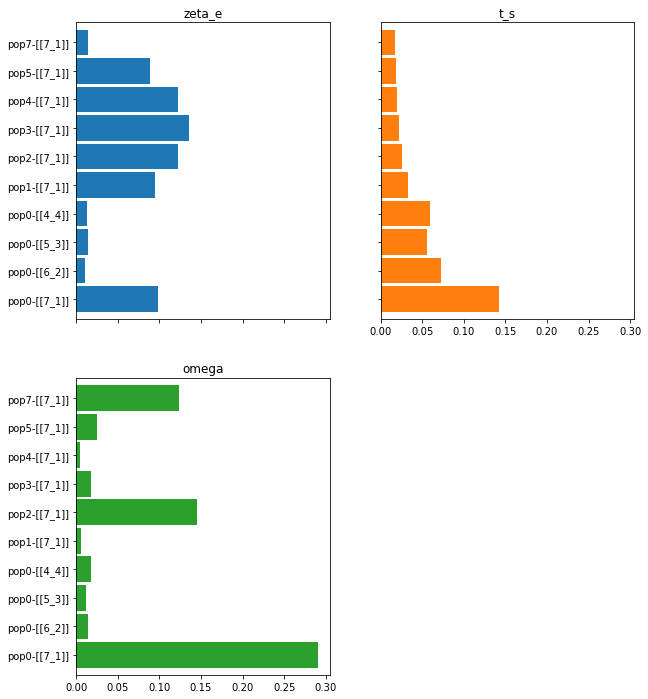

In [25]:
axs = rgr_unsorted.plot_feature_importance()

## Sorted summary statistics

In [58]:
expanding_sorted_msfs = PTA.msfs.multiSFS(exp_sfs, sort=True, proportions=True)
display(expanding_sorted_msfs.df)
display(expanding_sorted_msfs.to_dataframe())

sim_sorted_df = pd.read_csv("./analysis/8pops_16samps_expanding_sims/expanding-sorted-props-SIMOUT.csv", sep=" ")
print(len(sim_sorted_df))

,pop0,pop1,pop2,pop3,pop4,pop5,pop6,pop7
[[15__1]],0.719345,0.651624,0.638225,0.623412,0.467658,0.461248,0.432446,0.403522
[[14__2]],0.179065,0.176109,0.175425,0.156519,0.155779,0.132718,0.117429,0.080020
[[13__3]],0.114301,0.107011,0.105423,0.104182,0.076911,0.075098,0.071137,0.049826
[[12__4]],0.086772,0.083431,0.078274,0.073303,0.052831,0.048100,0.047590,0.039684
[[11__5]],0.071354,0.069837,0.061213,0.058367,0.036896,0.034472,0.033929,0.033921
[[10__6]],0.062771,0.062157,0.050942,0.049809,0.031297,0.031049,0.030965,0.027137
[[9_7]],0.058798,0.057620,0.048716,0.042333,0.030458,0.028206,0.023787,0.023548
[[8_8]],0.029188,0.028164,0.024177,0.019866,0.015441,0.014033,0.013668,0.011462


,pop0-[[15__1]],pop0-[[14__2]],pop0-[[13__3]],pop0-[[12__4]],pop0-[[11__5]],pop0-[[10__6]],pop0-[[9_7]],pop0-[[8_8]],pop1-[[15__1]],pop1-[[14__2]],pop1-[[13__3]],pop1-[[12__4]],pop1-[[11__5]],pop1-[[10__6]],pop1-[[9_7]],pop1-[[8_8]],pop2-[[15__1]],pop2-[[14__2]],pop2-[[13__3]],pop2-[[12__4]],pop2-[[11__5]],pop2-[[10__6]],pop2-[[9_7]],pop2-[[8_8]],pop3-[[15__1]],pop3-[[14__2]],pop3-[[13__3]],pop3-[[12__4]],pop3-[[11__5]],pop3-[[10__6]],pop3-[[9_7]],pop3-[[8_8]],pop4-[[15__1]],pop4-[[14__2]],pop4-[[13__3]],pop4-[[12__4]],pop4-[[11__5]],pop4-[[10__6]],pop4-[[9_7]],pop4-[[8_8]],pop5-[[15__1]],pop5-[[14__2]],pop5-[[13__3]],pop5-[[12__4]],pop5-[[11__5]],pop5-[[10__6]],pop5-[[9_7]],pop5-[[8_8]],pop6-[[15__1]],pop6-[[14__2]],pop6-[[13__3]],pop6-[[12__4]],pop6-[[11__5]],pop6-[[10__6]],pop6-[[9_7]],pop6-[[8_8]],pop7-[[15__1]],pop7-[[14__2]],pop7-[[13__3]],pop7-[[12__4]],pop7-[[11__5]],pop7-[[10__6]],pop7-[[9_7]],pop7-[[8_8]]
0,0.719345,0.179065,0.114301,0.086772,0.071354,0.062771,0.058798,0.029188,0.651624,0.176109,0.107011,0.083431,0.069837,0.062157,0.05762,0.028164,0.638225,0.175425,0.105423,0.078274,0.061213,0.050942,0.048716,0.024177,0.623412,0.156519,0.104182,0.073303,0.058367,0.049809,0.042333,0.019866,0.467658,0.155779,0.076911,0.052831,0.036896,0.031297,0.030458,0.015441,0.461248,0.132718,0.075098,0.0481,0.034472,0.031049,0.028206,0.014033,0.432446,0.117429,0.071137,0.04759,0.033929,0.030965,0.023787,0.013668,0.403522,0.08002,0.049826,0.039684,0.033921,0.027137,0.023548,0.011462


80000


In [11]:
 
rgr = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                              sims=sim_sorted_df)
rgr.set_params(rgrq_params)
est = rgr.predict(select_features=False, param_search=False, quick=True, verbose=False)
est

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.913249,7.570686,0.975156,471607.365583,0.023047,574738.033201,79922.060835,0.003467,-2.671569,563761.472246,98144.564409,9.075726,1.672777,-0.001359,-2.659492,9.315626,1.828270,442588.151097,271315.795364,0.105452,-0.500979,440269.948056,417990.730617
lower 0.025,0.703627,6.000000,0.686892,31970.284165,0.000000,77150.773154,0.000000,-0.699000,-3.000000,146261.424285,0.000000,2.728016,0.000000,-0.685379,-3.000000,2.668063,0.000000,272895.485987,109291.159311,-1.191724,-1.677097,184697.017760,123281.077273
upper 0.975,0.995339,8.000000,1.000000,962619.812588,0.440719,975684.020371,403349.492369,0.949154,-1.500000,967200.549635,453785.226025,18.951818,7.095621,0.704000,-1.500000,18.935674,8.476829,743743.362907,359480.446097,1.465142,1.922384,821935.216479,724996.458863


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.913249,7.570686,0.975156,471607.365583,0.023047,574738.033201,79922.060835,0.003467,-2.671569,563761.472246,98144.564409,9.075726,1.672777,-0.001359,-2.659492,9.315626,1.828270,442588.151097,271315.795364,0.105452,-0.500979,440269.948056,417990.730617
lower 0.025,0.703627,6.000000,0.686892,31970.284165,0.000000,77150.773154,0.000000,-0.699000,-3.000000,146261.424285,0.000000,2.728016,0.000000,-0.685379,-3.000000,2.668063,0.000000,272895.485987,109291.159311,-1.191724,-1.677097,184697.017760,123281.077273
upper 0.975,0.995339,8.000000,1.000000,962619.812588,0.440719,975684.020371,403349.492369,0.949154,-1.500000,967200.549635,453785.226025,18.951818,7.095621,0.704000,-1.500000,18.935674,8.476829,743743.362907,359480.446097,1.465142,1.922384,821935.216479,724996.458863


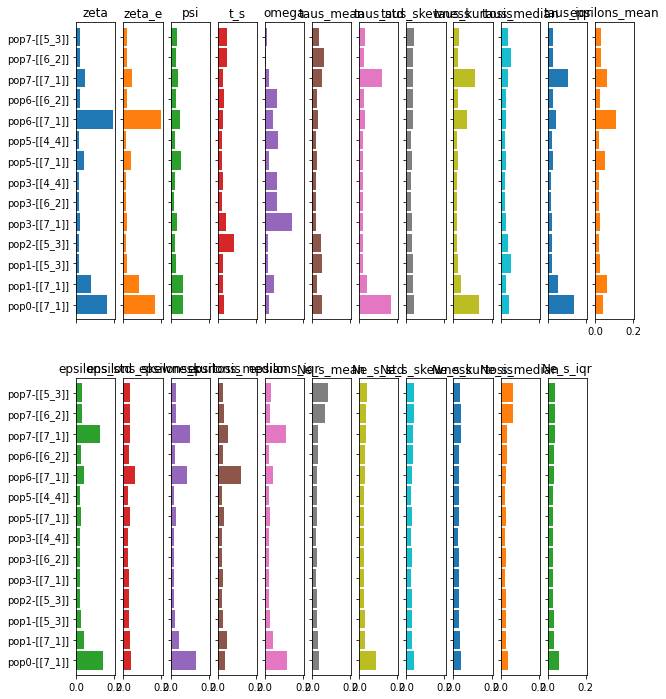

In [14]:
display(est)
axs = rgr.plot_feature_importance()

# RandomForest

In [ ]:
## parameters from a cv_search process which took like a day, don't want to redo it.
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Unsorted

    w/ quick=True
    2021-09-16 10:23:53.176613
    2021-09-16 10:26:10.980052
    
                  zeta_e	t_s    omega
    estimate	5.546885	491896.23111	0.000291

2021-09-16 10:32:02.732011
2021-09-16 10:34:16.433432


,zeta_e,t_s,omega
estimate,5.570182,511872.977605,0.000146


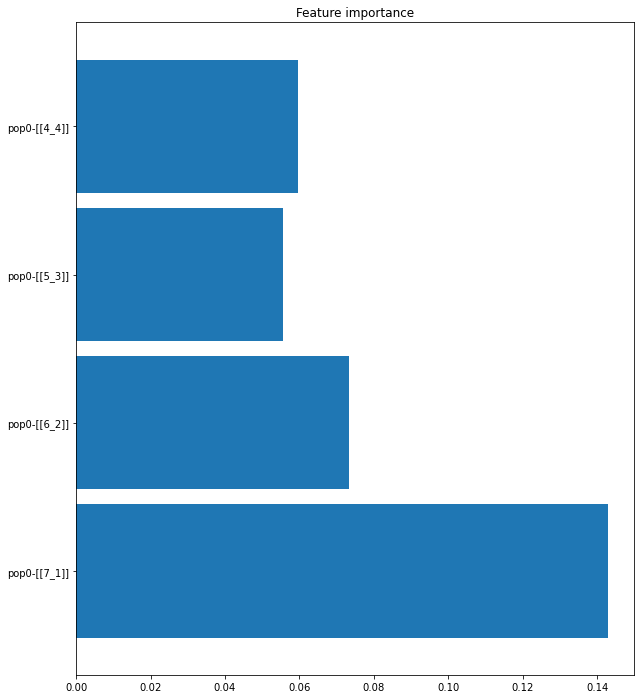

In [30]:
print(datetime.datetime.now())
rfrgr_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df,
                                       algorithm="rf")
rfrgr_unsorted.set_params(rgr_params)
rfrgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
rfest_unsorted = rfrgr_unsorted.predict(select_features=False,
                                        param_search=False,
                                        quick=False,
                                        verbose=False)
axs = rfrgr_unsorted.plot_feature_importance()
print(datetime.datetime.now())
rfest_unsorted

## Sorted

2021-09-16 10:26:48.683367
2021-09-16 10:27:35.700765


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
estimate,0.919058,7.498678,1.0,562300.646591,0.000237,529919.236914,63507.039815,0.013191,-2.573644,527670.62406,68763.692536,9.001999,1.199052,0.018966,-2.576952,8.882011,1.293557,444506.0802,288094.450701,0.074864,-0.998961,436420.442863,424836.252765


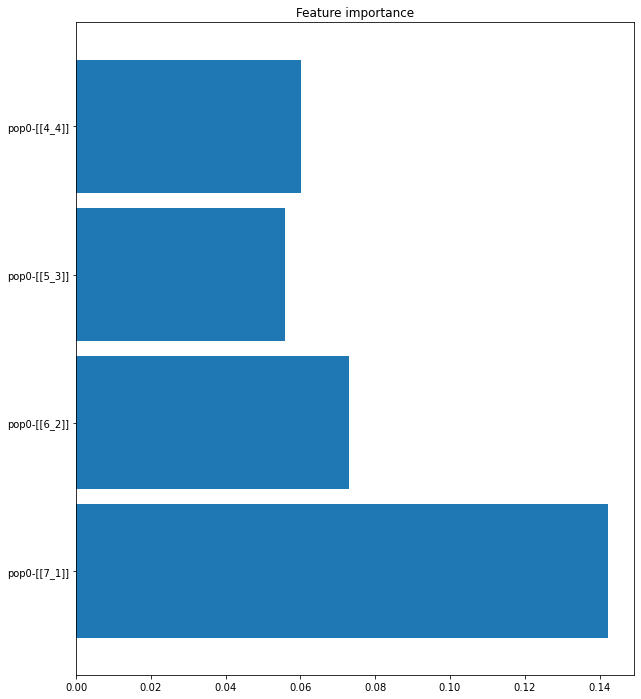

In [29]:
print(datetime.datetime.now())
rfrgr = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                              sims=sim_sorted_df,
                              algorithm="rf")
rfrgr.set_params(rgr_params)
rfrgr_unsorted.set_targets(["zeta_e", "t_s", "omega"])
rfest_sorted = rfrgr.predict(select_features=False,
                             param_search=False,
                             quick=True,
                             verbose=False)
axs = rfrgr_unsorted.plot_feature_importance()
print(datetime.datetime.now())
rfest_sorted

# GB

```
Best params for zeta_e: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.012589254117941661}

Best params for t_s: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'learning_rate': 0.0025118864315095794}
```

In [61]:
gb_params = {'n_estimators': 100,
             'min_samples_split': 5,
             'min_samples_leaf': 4,
             'max_features': 'auto',
             'max_depth': 10,
             'learning_rate': 0.012589254117941661}

## Unsorted

2022-02-03 12:55:42.987284
Predict() started: 2022-02-03 12:55:43.040367
Predict() finished: 2022-02-03 13:48:00.217293
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
2022-02-03 15:24:01.250034
CPU times: user 2h 28min 14s, sys: 4.08 s, total: 2h 28min 18s
Wall time: 2h 28min 18s


,zeta_e,t_s,omega
estimate,0.866799,618994.975565,190444.750779
lower 0.025,0.000000,120789.477365,17320.280825
upper 0.975,7.987728,821443.702891,312840.386714


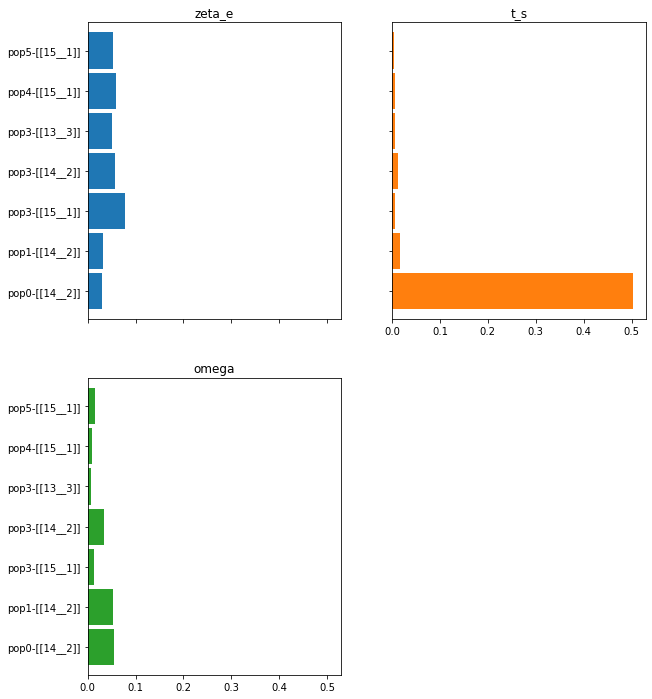

In [42]:
%%time
print(datetime.datetime.now())
gb_unsorted = PTA.inference.Regressor(empirical_df=expanding_unsorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df,
                                       algorithm="gb")
gb_unsorted.set_targets(["zeta_e", "t_s", "omega"])
gb_unsorted.set_params(gb_params)
gb_unsorted_est = gb_unsorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_unsorted.plot_feature_importance()
print(datetime.datetime.now())
gb_unsorted_est

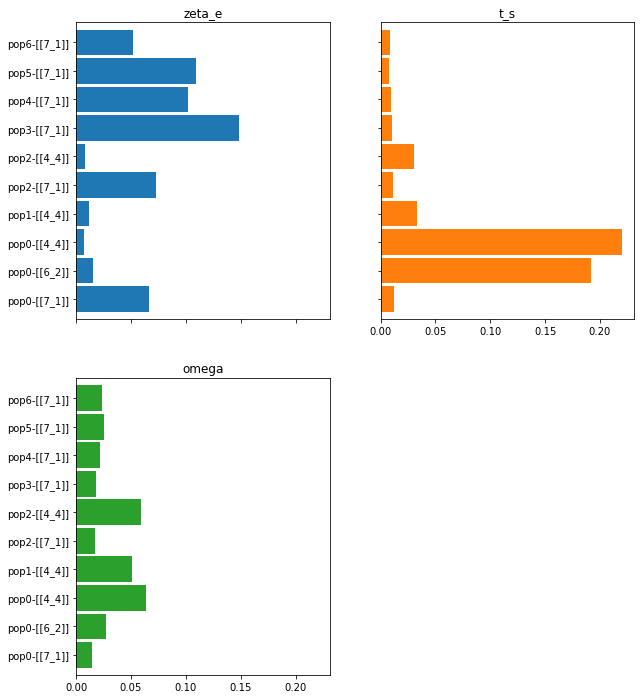

In [15]:
axs = gb_unsorted.plot_feature_importance()


## Sorted

In [12]:
print(datetime.datetime.now())
gb_sorted = PTA.inference.Regressor(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=sim_sorted_df,
                                       algorithm="gb")
gb_sorted.set_targets(["zeta_e", "t_s", "omega"])
gb_sorted.set_params(gb_params)
gb_sorted_est = gb_sorted.predict(select_features=False,
                                     param_search=False,
                                     quick=False,
                                     verbose=True)
axs = gb_sorted.plot_feature_importance()
print(datetime.datetime.now())
gb_sorted_est

2021-11-14 06:31:15.458794
Predict() started: 2021-11-14 06:31:15.501820
Predict() finished: 2021-11-14 06:57:26.250948
Calculating prediction interval(s)
	zeta_e
	t_s
	omega
2021-11-14 07:53:13.067788


,zeta_e,t_s,omega
estimate,3.109540,505843.444110,168103.495999
lower 0.025,1.417752,32463.041867,28593.029260
upper 0.975,5.869906,901508.377430,347981.800273


In [54]:
axs = gb_sorted.plot_feature_importance()


NameError: name 'gb_sorted' is not defined

## GB Classification
## Unsorted

Predict() started: 2022-04-04 16:37:20.007190
Predict() finished: 2022-04-04 16:52:43.947611
              precision    recall  f1-score   support

           0       0.26      0.05      0.08      2499
           1       0.58      0.66      0.62      5142
           2       0.61      0.54      0.58      4908
           3       0.58      0.57      0.58      4985
           4       0.59      0.59      0.59      5073
           5       0.54      0.48      0.51      4935
           6       0.47      0.53      0.50      4959
           7       0.44      0.79      0.56      5020
           8       0.56      0.10      0.16      2479

    accuracy                           0.53     40000
   macro avg       0.52      0.48      0.46     40000
weighted avg       0.53      0.53      0.51     40000



<AxesSubplot:xlabel='Predicted Ψ', ylabel='True Ψ'>

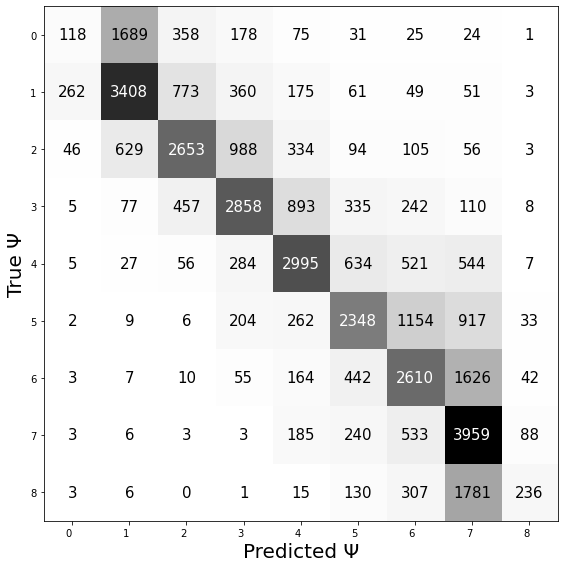

In [57]:
gb_unsorted_cl = PTA.inference.Classifier(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=sim_unsorted_df,
                                       algorithm="gb")
gb_unsorted_cl.set_params(gb_params)
gb_unsorted_cl.set_targets(["zeta_e"])
gb_unsorted_cl.predict(select_features=False,\
            param_search=False,\
            quick=True,\
            verbose=True)
cv_preds = gb_unsorted_cl.cross_val_predict(cv=3,
                    quick=True,
                    verbose=True)
gb_unsorted_cl.plot_confusion_matrix()

In [59]:
%%time
gb_unsorted_cl.set_data(expanding_unsorted_msfs.to_dataframe())
gb_unclass_est = gb_unsorted_cl.predict(select_features=False,\
                                    param_search=False,\
                                    quick=True,\
                                    verbose=True)
#axs = gb_unsorted_cl.plot_feature_importance()
gb_unclass_est

Predict() started: 2022-04-07 08:25:51.549001
CPU times: user 29.1 ms, sys: 50 µs, total: 29.2 ms
Wall time: 27.7 ms


(          zeta_e
 estimate       1,
               0         1         2         3         4         5         6  \
 zeta_e  0.19045  0.285436  0.081213  0.077165  0.064263  0.073687  0.087134   
 
                7         8  
 zeta_e  0.086742  0.053911  )

<BarContainer object of 9 artists>

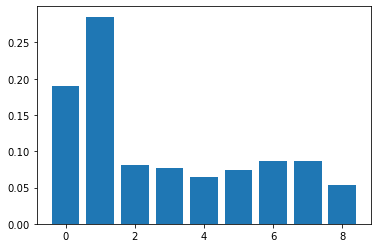

In [60]:
plt.bar(np.arange(9), gb_unclass_est[1].values[0])

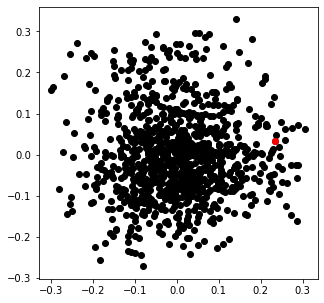

In [53]:
from sklearn.decomposition import PCA

dat = sim_unsorted_df[sim_unsorted_df["zeta_e"] == 1].iloc[:1000, 23:]
dat = pd.concat([expanding_unsorted_msfs.to_dataframe(), dat])

pca = PCA(n_components=2)
pcs = pca.fit_transform(dat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(pcs[:, 0], pcs[:, 1], c='black')
## Plot the observed ss in red
ax.scatter(pcs[:, 0][0], pcs[:, 1][0], c='r')

## Sorted

Predict() started: 2022-04-07 08:26:58.327013
Predict() finished: 2022-04-07 08:56:09.431834
              precision    recall  f1-score   support

           0       0.15      0.01      0.01      4890
           1       0.44      0.70      0.54     10069
           2       0.37      0.34      0.36     10056
           3       0.47      0.44      0.45      9838
           4       0.50      0.46      0.48      9972
           5       0.43      0.41      0.42     10010
           6       0.42      0.35      0.38     10174
           7       0.47      0.61      0.53     10056
           8       0.56      0.55      0.56      4935

    accuracy                           0.45     80000
   macro avg       0.42      0.43      0.41     80000
weighted avg       0.43      0.45      0.43     80000



<AxesSubplot:xlabel='Predicted Ψ', ylabel='True Ψ'>

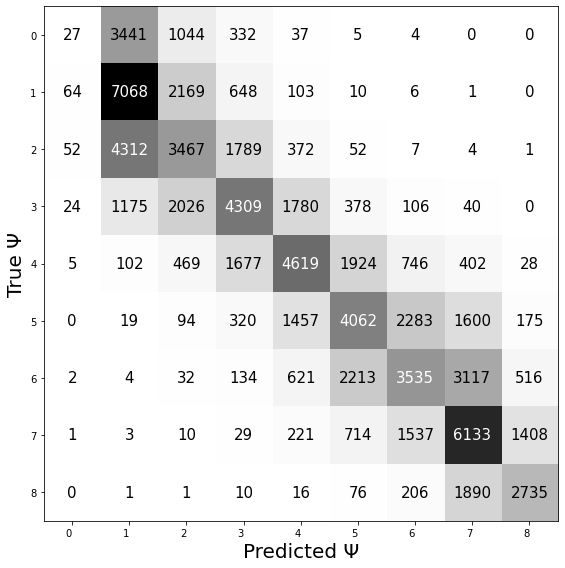

In [62]:
gb_sorted_cl = PTA.inference.Classifier(empirical_df=expanding_sorted_msfs.to_dataframe(),
                                       sims=sim_sorted_df,
                                       algorithm="gb")
gb_sorted_cl.set_params(gb_params)
gb_sorted_cl.set_targets(["zeta_e"])
gb_sorted_cl.predict(select_features=False,\
            param_search=False,\
            quick=True,\
            verbose=True)
cv_preds = gb_sorted_cl.cross_val_predict(cv=3,
                    quick=True,
                    verbose=True)
gb_sorted_cl.plot_confusion_matrix()

Predict() started: 2022-04-07 13:42:41.068777
CPU times: user 84.1 ms, sys: 0 ns, total: 84.1 ms
Wall time: 82 ms


(          zeta_e
 estimate       2,
                0         1         2         3         4         5         6  \
 zeta_e  0.100733  0.262359  0.342734  0.115946  0.064088  0.033363  0.032801   
 
                7         8  
 zeta_e  0.032254  0.015722  )

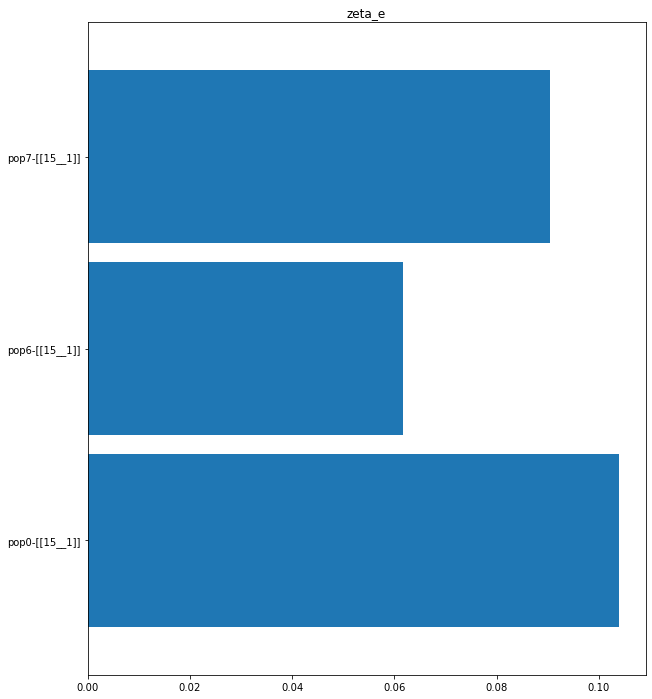

In [63]:
%%time
gb_sorted_cl.set_data(expanding_sorted_msfs.to_dataframe())
gb_class_est = gb_sorted_cl.predict(select_features=False,\
                                    param_search=False,\
                                    quick=True,\
                                    verbose=True)
axs = gb_sorted_cl.plot_feature_importance()
gb_class_est

<BarContainer object of 9 artists>

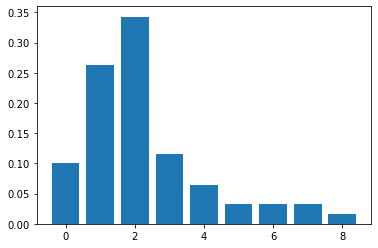

In [64]:
plt.bar(np.arange(9), gb_class_est[1].values[0])

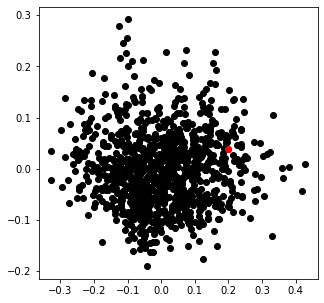

In [65]:
from sklearn.decomposition import PCA

dat = sim_sorted_df[sim_sorted_df["zeta_e"] == 2].iloc[:1000, 23:]
dat = pd.concat([expanding_sorted_msfs.to_dataframe(), dat])

pca = PCA(n_components=2)
pcs = pca.fit_transform(dat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(pcs[:, 0], pcs[:, 1], c='black')
## Plot the observed ss in red
ax.scatter(pcs[:, 0][0], pcs[:, 1][0], c='r')

In [77]:
## parameters from a cv_search process which took like a day, don't want to redo it.
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

params = ["t_s", "taus_mean", "taus_std", "epsilons_mean", "epsilons_std", "Ne_s_mean", "Ne_s_std"]
test_X = expanding_sorted_msfs.to_dataframe()

pruned_sorted_df = sim_sorted_df[sim_sorted_df["zeta_e"].between(2, 4)]

X = pruned_sorted_df[test_X.columns]
y = pruned_sorted_df[params]

rf = RandomForestRegressor(**rgr_params)
rf.fit(X, y)

CPU times: user 37min 3s, sys: 1.71 s, total: 37min 5s
Wall time: 57.8 s


RandomForestRegressor(max_depth=70, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=1400, n_jobs=-1)

In [111]:
## Prediction from pruned simulations
pd.DataFrame(rf.predict(test_X), columns=params)

,t_s,taus_mean,taus_std,epsilons_mean,epsilons_std,Ne_s_mean,Ne_s_std
0,108728.111172,334043.192361,277892.113687,0.061209,0.021797,2.739585e+06,1.300140e+06


In [80]:
## Prediction using all simulations
pd.DataFrame(rf.predict(test_X), columns=params)

,t_s,taus_mean,taus_std,epsilons_mean,epsilons_std,Ne_s_mean,Ne_s_std
0,236925.146294,375819.02518,279453.642938,0.063186,0.02271,2.705590e+06,1.340757e+06


## Resampling simulations for prediction interval

In [114]:
%%time
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

preds = []
for train_index, test_index in kf.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    rf.fit(X_train, y_train)
    preds.append(rf.predict(test_X))

CPU times: user 2h 24min 36s, sys: 7.56 s, total: 2h 24min 44s
Wall time: 3min 49s


In [127]:
preds = np.vstack(preds)
for i, param in enumerate(params):
    vals = preds[:, i]
    print(param, np.min(vals), np.max(vals))

t_s 104545.65710804249 119227.95580219169
taus_mean 326662.34638929804 338892.97876468976
taus_std 274611.9489796165 278418.1709436388
epsilons_mean 0.060443762029814975 0.061762860027927226
epsilons_std 0.021695198229233353 0.021977269062320642
Ne_s_mean 2692345.4240407017 2755356.690086719
Ne_s_std 1293583.752673209 1318521.7716503856


## Quantile regression for prediction interval

In [137]:
## parameters from a cv_search process which took like a day, don't want to redo it.
rfq_params = {'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [143]:
%%time
## 50% Quantiles
from skgarden import RandomForestQuantileRegressor
rfqr = RandomForestQuantileRegressor(**rfq_params)
rfq_preds = pd.DataFrame([], index=["med", "up", "low"])
for idx, param in enumerate(["t_s", "taus_mean"]):
    print(param),
    rfqr.fit(X, y[param])
    upper = rfqr.predict(test_X, quantile=75)
    mid = rfqr.predict(test_X, quantile=50)
    lower = rfqr.predict(test_X, quantile=25)
    rfq_preds[param] = [mid, upper, lower]
rfq_preds

t_s
taus_mean
CPU times: user 1h 23min 18s, sys: 5.63 s, total: 1h 23min 24s
Wall time: 20min 26s


,t_s,taus_mean
med,[64770.3440844009],[395031.0339597315]
up,[110635.6563732483],[450646.9945184025]
low,[39786.31489324779],[344956.3908680029]


In [140]:
%%time
## 95% Quantiles
from skgarden import RandomForestQuantileRegressor
rfqr = RandomForestQuantileRegressor(**rfq_params)
rfq_preds = pd.DataFrame([], index=["med", "up", "low"])
for idx, param in enumerate(params):
    print(param),
    rfqr.fit(X, y[param])
    upper = rfqr.predict(test_X, quantile=98.5)
    mid = rfqr.predict(test_X, quantile=50)
    lower = rfqr.predict(test_X, quantile=2.5)
    rfq_preds[param] = [mid, upper, lower]
rfq_preds

t_s
taus_mean
taus_std
epsilons_mean
epsilons_std
Ne_s_mean
Ne_s_std


,t_s,taus_mean,taus_std,epsilons_mean,epsilons_std,Ne_s_mean,Ne_s_std
med,[64233.755579948775],[394750.82437036396],[296671.2174661977],[0.061000000685453415],[0.02199999988079071],[2679857.5719329743],[1443958.8398798087]
up,[781944.0724700761],[598974.9038461539],[395670.85251724394],[0.07800000160932541],[0.03200000151991844],[3653198.3996752608],[1878330.55312426]
low,[17005.61563841683],[236558.645513251],[134891.8307401791],[0.04437250339536658],[0.012581252109572828],[1752692.6565653677],[896310.0710622799]


In [112]:
%%time
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(rf, X, y, cv=3)

CPU times: user 39 s, sys: 9.79 s, total: 48.8 s
Wall time: 2min 4s


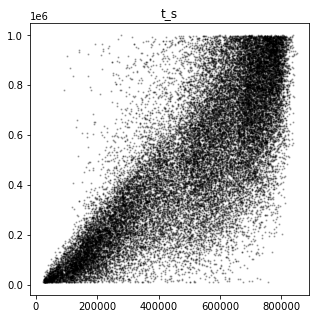

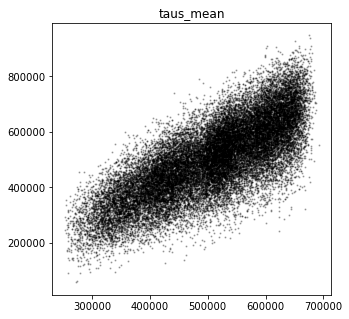

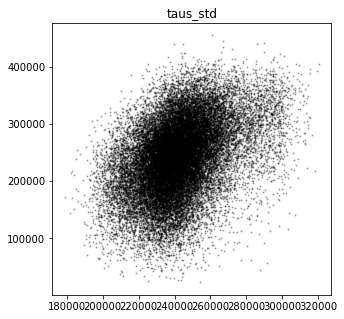

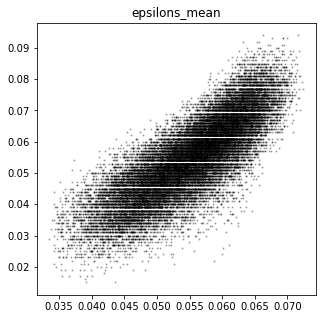

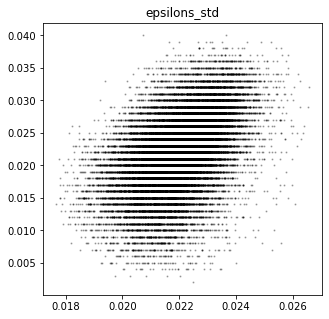

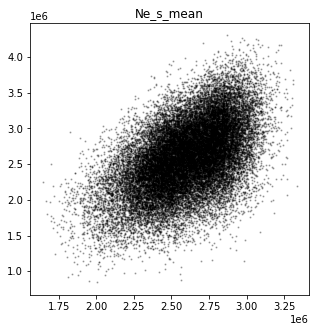

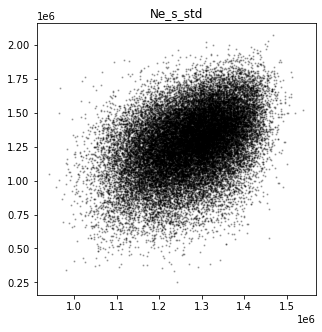

In [113]:
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(3, 2, figsize=(8, 8))
for i, p in enumerate(params):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(preds[:, i], y[p], marker='.', s=5, color='black', alpha=0.25)
    ax.set_title(p)
